# Data Analysis on Start-ups Success

This dataset contains eleven tables. This notebook is broadly divided into three part - 
1. Exploratory Analysis and Data Cleaning
2. Data Analysis 
3. Model Building

Moreover, we have added a supplementary efforts of web scraping for this analysis and it's outcome. 

In [1]:
# environment setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Data Import

#### 'degree' table exploration and cleanup

In [2]:
degrees= pd.read_csv('degrees.csv')
degrees.head()

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


In [3]:
degrees.dtypes

id               int64
object_id       object
degree_type     object
subject         object
institution     object
graduated_at    object
created_at      object
updated_at      object
dtype: object

In [4]:
degrees.shape

(109610, 8)

In [5]:
## checking on the count of missing fields/information
degrees[degrees.isnull().any(axis=1)].count()

id              63522
object_id       63522
degree_type     52304
subject         35210
institution     63467
graduated_at    11966
created_at      63522
updated_at      63522
dtype: int64

In [6]:
#There are lots of missing values in subject and graduated_at, so I drop those columns. created_at and Updated_at are not usefull I get rid of them too.
degrees.drop(['subject','graduated_at','created_at','updated_at','id'], 'columns', inplace=True)
degrees.head()

,object_id,degree_type,institution
0,p:6117,MBA,NaN
1,p:6136,BA,"Washington University, St. Louis"
2,p:6136,MS,Boston University
3,p:6005,MS,University of Greenwich
4,p:5832,BCS,Rice University


In [7]:
degrees = degrees[~(degrees['degree_type'].isnull() | degrees['institution'].isnull())]
degrees.isnull().sum()

object_id      0
degree_type    0
institution    0
dtype: int64

In [8]:
dupes = degrees.duplicated()
sum(dupes)

773

#### 'people' table exploration and cleanup



In [9]:
people =  pd.read_csv('people.csv')
people.head()

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


In [10]:
people.shape

(226709, 6)

In [11]:
people.dtypes

id                   int64
object_id           object
first_name          object
last_name           object
birthplace          object
affiliation_name    object
dtype: object

In [12]:
people.isnull().sum()

id                       0
object_id                0
first_name               5
last_name                1
birthplace          198625
affiliation_name        20
dtype: int64

In [13]:
#Dropping rows based on null columns
people = people[~(people['first_name'].isnull() | people['last_name'].isnull() | people['birthplace'].isnull() | people['affiliation_name'].isnull())]

In [14]:
people.isnull().sum()

id                  0
object_id           0
first_name          0
last_name           0
birthplace          0
affiliation_name    0
dtype: int64

In [15]:
#get acquisitions data
acquisitions = pd.read_csv('acquisitions.csv',index_col=0)
display(acquisitions.head(5))

,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
id,,,,,,,,,,,
1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [16]:
ipos = pd.read_csv('ipos.csv',index_col=0)
display(ipos.head(5))

,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at
id,,,,,,,,,,,,
1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59
2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46
3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16
4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08
5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22


#### 'objects' table exploration and cleanup


In [17]:
objects = pd.read_csv('objects.csv')
objects.head(10)

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18
5,c:10002,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,...,NaN,0,0.0,NaN,NaN,0,2,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19
6,c:10003,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20
7,c:100042,Company,100042,NaN,HostNine,hostnine,/company/hostnine,NaN,operating,NaN,...,NaN,0,0.0,2011-06-20,2011-06-20,1,1,NaN,2011-09-07 00:53:17,2011-12-20 09:09:53
8,c:10005,Company,10005,NaN,Thomas Publishing,thomas publishing,/company/thomas-publishing,advertising,operating,NaN,...,NaN,0,0.0,1999-06-01,1999-06-01,1,2,NaN,2008-08-24 20:21:21,2009-11-19 17:21:00
9,c:100062,Company,100062,NaN,Vetter Idea Management System,vetter idea management system,/company/vetter-idea-management-system,enterprise,operating,2011-08-01,...,NaN,0,0.0,2011-08-01,2011-08-01,1,2,dmurtagh,2011-09-07 01:04:56,2011-09-24 13:13:18


In [149]:
objects.shape

(462651, 40)

In [18]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462649 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [19]:
# Defining a function to handle missing values
def missing_values_table(df):
        
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
      
        return mis_val_table_only

In [20]:
missing=missing_values_table(objects)
missing

,Missing Values,% of Total Values
parent_id,434936,94.009523
name,2,0.000432
normalized_name,31,0.006701
category_code,339465,73.373882
founded_at,362210,78.290115
closed_at,459842,99.392847
domain,287709,62.187048
homepage_url,287709,62.187048
twitter_username,336562,72.746411
logo_url,253801,54.857982


In [21]:
objects['status'].value_counts()

operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64

In [22]:
objects['entity_type'].value_counts()

Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64

In [156]:
objects['category_code'].value_counts()

software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
hospitality           768
news                  768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [23]:
objects['overview']

0         Wetpaint is a technology platform company that...
1         Flektor is a rich-media mash-up platform that ...
2         There.com is an online virtual world where any...
3         BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...
4         This company shows free movies online on their...
                                ...                        
462646                                                  NaN
462647                                                  NaN
462648                                                  NaN
462649                                                  NaN
462650                                                  NaN
Name: overview, Length: 462651, dtype: object

Checking columns with more than 70% missing values

In [24]:
missing_columns = list(missing.index[missing['% of Total Values'] > 70])
missing_columns

['parent_id',
 'category_code',
 'founded_at',
 'closed_at',
 'twitter_username',
 'short_description',
 'description',
 'tag_list',
 'country_code',
 'state_code',
 'city',
 'first_investment_at',
 'last_investment_at',
 'first_funding_at',
 'last_funding_at',
 'first_milestone_at',
 'last_milestone_at']

In [25]:
objects1 = objects.drop(columns = missing_columns) #droping the above list of missing values

In [26]:
re_missing=missing_values_table(objects1)  #rechecking the rest of the missing values
re_missing

,Missing Values,% of Total Values
name,2,0.000432
normalized_name,31,0.006701
domain,287709,62.187048
homepage_url,287709,62.187048
logo_url,253801,54.857982
overview,227416,49.154979
created_by,123165,26.621579
created_at,60,0.012969


In [29]:
objects_cleaned = objects1.drop(['homepage_url','logo_url','created_by','normalized_name','domain','logo_height','logo_width','permalink','overview'], axis=1)
objects_cleaned  #'name' and 'normalized_name' are same but normalized_name has all lower case character.

,id,entity_type,entity_id,name,status,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at
0,c:1,Company,1,Wetpaint,operating,Seattle,0,0,3,39750000.0,5,17,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,Flektor,acquired,Los Angeles,0,0,0,0.0,0,6,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,There,acquired,SF Bay,0,0,0,0.0,4,12,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,MYWEBBO,operating,unknown,0,0,0,0.0,0,0,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,THE Movie Streamer,operating,unknown,0,0,0,0.0,0,0,2008-08-24 17:10:34,2008-09-06 14:19:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462646,r:9995,Product,9995,"SiteLink, listing feed for Brokerages",operating,unknown,0,0,0,0.0,0,0,2008-11-28 14:34:12,2008-11-28 23:24:22
462647,r:9996,Product,9996,"EDCLink, listing feed for Economic Development...",operating,unknown,0,0,0,0.0,0,0,2008-11-28 14:34:13,2008-11-28 23:24:23
462648,r:9997,Product,9997,"Cmail, broadcast email marketing",operating,unknown,0,0,0,0.0,0,0,2008-11-28 14:34:13,2008-11-28 23:24:23
462649,r:9998,Product,9998,"CatylistCRM, contact database",operating,unknown,0,0,0,0.0,0,0,2008-11-28 14:34:13,2008-11-28 23:24:23


In [30]:
objects_cleaned['category_code'] = objects['category_code'].values  #re-adding the 'category_code' column to see the big picture 
objects_cleaned.head()

,id,entity_type,entity_id,name,status,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,category_code
0,c:1,Company,1,Wetpaint,operating,Seattle,0,0,3,39750000.0,5,17,2007-05-25 06:51:27,2013-04-13 03:29:00,web
1,c:10,Company,10,Flektor,acquired,Los Angeles,0,0,0,0.0,0,6,2007-05-31 21:11:51,2008-05-23 23:23:14,games_video
2,c:100,Company,100,There,acquired,SF Bay,0,0,0,0.0,4,12,2007-08-06 23:52:45,2013-11-04 02:09:48,games_video
3,c:10000,Company,10000,MYWEBBO,operating,unknown,0,0,0,0.0,0,0,2008-08-24 16:51:57,2008-09-06 14:19:18,network_hosting
4,c:10001,Company,10001,THE Movie Streamer,operating,unknown,0,0,0,0.0,0,0,2008-08-24 17:10:34,2008-09-06 14:19:18,games_video


#### 'investments' table exploration and cleanup

In [31]:
investments = pd.read_csv('investments.csv', index_col='id')
investments.head(10)

,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
id,,,,,
1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24
6,4,c:5,f:6,2007-05-27 06:09:36,2013-06-28 20:07:24
7,4,c:5,f:3181,2007-05-27 06:09:36,2013-06-28 20:07:24
8,5,c:7299,f:3,2007-05-29 11:05:59,2008-04-16 17:09:12
9,6,c:9,f:6,2007-05-31 20:19:28,2009-01-19 18:29:39


In [32]:
investments.describe()

,funding_round_id
count,80902.000000
mean,24020.171257
std,15163.034069
min,1.000000
25%,11747.250000
50%,22594.500000
75%,34794.000000
max,57948.000000


In [33]:
investments.shape

(80902, 5)

In [34]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80902 entries, 1 to 80902
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   funding_round_id    80902 non-null  int64 
 1   funded_object_id    80902 non-null  object
 2   investor_object_id  80902 non-null  object
 3   created_at          80902 non-null  object
 4   updated_at          80902 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [35]:
investments.nunique()

funding_round_id      33188
funded_object_id      21607
investor_object_id    17152
created_at            32649
updated_at            28647
dtype: int64

In [36]:
investments['funded_object_id'].value_counts()

c:169876    58
c:28535     58
c:32499     54
c:6460      53
c:16284     49
            ..
c:9816       1
c:154356     1
c:31381      1
c:66177      1
c:195757     1
Name: funded_object_id, Length: 21607, dtype: int64

In [37]:
#Checking missing values
investments.isnull().any() 

funding_round_id      False
funded_object_id      False
investor_object_id    False
created_at            False
updated_at            False
dtype: bool

In [38]:
investments.duplicated() #checking the duplicated status of the values

id
1        False
2        False
3        False
4        False
5        False
         ...  
80898    False
80899    False
80900    False
80901    False
80902    False
Length: 80902, dtype: bool

In [39]:
investments_cleaned=investments.drop(['created_at','updated_at'],axis=1)
investments_cleaned.head(5)

,funding_round_id,funded_object_id,investor_object_id
id,,,
1,1,c:4,f:1
2,1,c:4,f:2
3,3,c:5,f:4
4,4,c:5,f:1
5,4,c:5,f:5


> 




#### 'funds' table exploration and cleanup

In [40]:
funds = pd.read_csv('funds.csv')
funds.head(10)

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 3:07,2008-12-17 3:07
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04,2008-12-18 22:04
2,5,5,f:951,Tenth fund,2008-08-11,650000000,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 9:47,2008-12-31 9:47
3,6,6,f:192,New funds acquire,NaN,625000000,USD,http://venturebeat.com/2008/07/28/us-venture-p...,U.S. Venture Partners raises $625M fund for ne...,2009-01-01 18:13,2009-01-01 18:16
4,7,7,f:519,Third fund,2008-05-20,200000000,USD,http://venturebeat.com/2008/05/20/disneys-stea...,Venture Beat,2009-01-03 9:51,2013-09-03 16:34
5,8,8,f:1811,Inventus Capital Partners Fund I LP,2007-11-30,51750000,USD,http://venturebeat.com/2008/01/14/kanwal-rekhi...,Kanwal Rekhiâs India-focused firm Inventus,2009-01-06 18:58,2010-09-03 21:46
6,9,9,f:849,Unattributed,2008-04-16,512000000,USD,http://venturebeat.com/2008/04/16/ftventures-r...,Venture Beat,2009-01-07 4:23,2009-01-07 4:23
7,10,10,f:1829,Sequoia Capital Investment,2007-09-23,5000000,USD,http://venturebeat.com/2007/10/23/sequoia-capi...,"Sequoia Capital invests in Noah, a Chinese wea...",2009-01-07 16:12,2009-01-07 16:12
8,11,11,f:1846,Roll Up Strategy,2007-07-09,100000000,USD,http://venturebeat.com/2007/07/09/bertram-capi...,"Bertram Capital raises $100M more, for rollup ...",2009-01-08 18:37,2009-01-08 18:38
9,12,12,f:1846,Roll Up Strategy,2007-05-01,250000000,USD,http://venturebeat.com/2007/07/09/bertram-capi...,NaN,2009-01-08 18:38,2009-01-08 18:38


In [41]:
funds.shape

(1564, 11)

In [42]:
funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1564 non-null   int64 
 1   fund_id               1564 non-null   int64 
 2   object_id             1564 non-null   object
 3   name                  1564 non-null   object
 4   funded_at             1449 non-null   object
 5   raised_amount         1564 non-null   int64 
 6   raised_currency_code  1564 non-null   object
 7   source_url            1272 non-null   object
 8   source_description    1218 non-null   object
 9   created_at            1564 non-null   object
 10  updated_at            1564 non-null   object
dtypes: int64(3), object(8)
memory usage: 134.5+ KB


In [43]:
funds.nunique()

id                      1564
fund_id                 1564
object_id               1026
name                    1313
funded_at                780
raised_amount            530
raised_currency_code       7
source_url              1205
source_description      1102
created_at              1435
updated_at              1336
dtype: int64

In [44]:
funds['name'].value_counts()

Fund I                      61
Fund II                     48
Fund III                    37
Fund IV                     17
Fund VI                     14
                            ..
EC3H                         1
Aristos Venture Fund I       1
The Mojo Investment Fund     1
RCCF Fund I                  1
Allos II                     1
Name: name, Length: 1313, dtype: int64

In [45]:
funds.duplicated() #checking duplicated value status

0       False
1       False
2       False
3       False
4       False
        ...  
1559    False
1560    False
1561    False
1562    False
1563    False
Length: 1564, dtype: bool

In [46]:
funds_missing=missing_values_table(funds)  #applying the function to check the missing values
funds_missing

,Missing Values,% of Total Values
funded_at,115,7.352941
source_url,292,18.670077
source_description,346,22.122762


In [47]:
funds_cleaned = funds.drop(['source_url','source_description','id','created_at','updated_at'], axis=1)
funds_cleaned

,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code
0,1,f:371,Second Fund,2008-12-16,300000000,USD
1,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000,USD
2,5,f:951,Tenth fund,2008-08-11,650000000,USD
3,6,f:192,New funds acquire,NaN,625000000,USD
4,7,f:519,Third fund,2008-05-20,200000000,USD
...,...,...,...,...,...,...
1559,1697,f:101,Fund V,2013-12-11,150000000,USD
1560,1698,f:7331,JANVEST Technologies LP I,2013-03-19,5,USD
1561,1699,f:7791,Fund II,2013-12-11,5000000,USD
1562,1700,f:15091,Fund I,2013-12-11,1100000,USD


In [48]:
funds_cleaned.dropna(subset=['funded_at'],inplace=True) #ddropping the null values in the 'funded_at' column
funds_cleaned['funded_at'].isnull().sum()

0

#### 'offices' table exploration and cleanup

In [49]:
offices_list = pd.read_csv('offices.csv')

In [50]:
offices_list = offices_list.loc[(offices_list['country_code'].isin(['USA','CAN']))] #filter regions in North America
offices_list = offices_list.fillna('')
offices_list.head(10)

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,,
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,,
2,3,c:4,4,,SF Bay,135 Mississippi St,,San Francisco,94107,CA,USA,37.764726,-122.394523,,
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,,Menlo Park,94025,CA,USA,37.416050,-122.151801,,
5,6,c:8,8,,SF Bay,"959 Skyway Road, Suite 200",,San Carlos,94070,CA,USA,37.506885,-122.247573,,
6,7,c:9,9,Headquarters,Los Angeles,9229 W. Sunset Blvd.,,West Hollywood,90069,CA,USA,34.090368,-118.393064,,
7,8,c:10,10,,Los Angeles,"8536 National Blvd, Suite A",,Culver City,90232,CA,USA,34.025958,-118.379768,,
8,9,c:11,11,,Los Angeles,407 N Maple Dr,,Beverly Hills,90210,CA,USA,34.076179,-118.394170,,
9,10,c:12,12,,SF Bay,1355 Market St.,,San Francisco,94103,CA,USA,37.776805,-122.416924,,
10,11,c:14,14,,SF Bay,,,Menlo Park,,CA,USA,37.484130,-122.169472,,


#### Joining three tables - 'offices','funding_rounds' and 'acquisitions'

In [51]:
funding_rounds_list = pd.read_csv('funding_rounds.csv') 
funding_rounds_list.head(10)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12
5,6,6,c:9,2007-01-01,series-a,a,1500000.0,1500000.0,USD,8500000.0,...,10000000.0,USD,1,0,1,NaN,NaN,initial-importer,2007-05-31 20:19:28,2009-01-19 18:29:39
6,7,7,c:9,2007-03-01,series-b,b,10000000.0,10000000.0,USD,100000000.0,...,110000000.0,USD,1,0,0,http://www.techcrunch.com/2007/03/05/100-milli...,100 Million Valuation for Geni,initial-importer,2007-05-31 20:35:03,2009-01-19 18:29:39
7,8,8,c:13,2005-12-01,series-a,seed,1500000.0,1500000.0,USD,0.0,...,0.0,NaN,4,0,0,http://www.techcrunch.com/2006/11/14/stumbleup...,StumbleUpon May Be For Sale: 50M,initial-importer,2007-06-01 19:14:34,2011-03-10 02:38:18
8,9,9,c:14,2007-05-01,series-a,a,6300000.0,6300000.0,USD,0.0,...,0.0,NaN,2,0,1,http://www.techcrunch.com/2007/05/31/gizmoz-la...,NaN,initial-importer,2007-06-01 20:09:47,2008-03-17 04:11:44
9,10,10,c:15,2006-06-01,angel,seed,12000.0,12000.0,USD,0.0,...,0.0,NaN,1,0,1,http://www.techcrunch.com/2007/03/06/scribd-yo...,"Scribd ""YouTube for Documents"" Gets $300K",initial-importer,2007-06-02 07:36:21,2012-08-13 23:30:48


In [52]:
acquisitions_list = pd.read_csv('acquisitions.csv')
acquisitions_list.head(10)

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,2.000000e+07,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,6.000000e+07,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,2.800000e+08,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,1.000000e+08,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,2.500000e+07,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47
5,6,11,c:227,c:228,NaN,7.140000e+06,USD,2003-08-05,http://www.businessweek.com/magazine/content/0...,E-Society: My World Is Cyworld,2007-07-20 09:58:29,2009-04-07 22:02:37
6,7,12,c:5,c:230,cash,0.000000e+00,USD,2007-07-01,http://www.techcrunch.com/2007/07/19/breaking-...,NaN,2007-07-26 07:36:07,2009-08-10 19:37:37
7,8,14,c:318,c:314,cash,0.000000e+00,USD,2006-10-01,http://techcrunch.com/2006/10/31/breaking-news...,Breaking News: Condé Nast/Wired Acquires Reddit,2007-07-31 07:38:36,2012-01-16 03:04:04
8,9,15,c:20,c:333,stock,1.500000e+09,USD,2002-07-08,http://news.cnet.com/2100-1017-941964.html,eBay picks up PayPal for $1.5 billion,2007-08-01 09:58:26,2008-10-06 19:04:29
9,10,16,c:342,c:341,cash,3.500000e+08,USD,2007-08-01,http://online.wsj.com/article/SB11859976880408...,Disney Buys Kids' Social-Network Site,2007-08-02 09:12:27,2009-08-31 17:43:37


In [53]:
# Merge offices and funding round table
offices = offices_list
funding_rounds_list = funding_rounds_list.merge(offices,on='object_id',how='left')
funding_rounds_list.head(5)

,id_x,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at_y,updated_at_y
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,135 Mississippi St,,San Francisco,94107,CA,USA,37.764726,-122.394523,,
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,1601 Willow Road,,Menlo Park,94025,CA,USA,37.416050,-122.151801,,
2,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,340 Madison Ave,,New York,10017,NY,USA,40.755716,-73.979247,,
3,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,1601 Willow Road,,Menlo Park,94025,CA,USA,37.416050,-122.151801,,
4,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,340 Madison Ave,,New York,10017,NY,USA,40.755716,-73.979247,,


In [54]:
# Merge offices and acquisitions table
acquisitions_list = acquisitions_list.merge(offices,right_on='object_id',left_on='acquired_object_id',how='left')
acquisitions_list.head(5)

,id_x,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,...,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at_y,updated_at_y
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,...,"8536 National Blvd, Suite A",,Culver City,90232,CA,USA,34.025958,-118.379768,,
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,...,"48389 Fremont Blvd., Suite #110",,Fremont,94538,CA,USA,37.465645,-121.932202,,
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,...,20 W Kinzie,9th Floor,Chicago,60610,IL,USA,41.889474,-87.628912,,
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,...,P.O. Box 1749,,Vashon,98070,WA,USA,47.420728,-122.450942,,


#### Joining three tables - 'objects','investments' and 'funds'

In [55]:
objects_cleaned.rename(columns={'id':'funded_object_id'}, inplace=True) #renaming the column to make a join with the investments table
objects_cleaned.head(5)

,funded_object_id,entity_type,entity_id,name,status,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,category_code
0,c:1,Company,1,Wetpaint,operating,Seattle,0,0,3,39750000.0,5,17,2007-05-25 06:51:27,2013-04-13 03:29:00,web
1,c:10,Company,10,Flektor,acquired,Los Angeles,0,0,0,0.0,0,6,2007-05-31 21:11:51,2008-05-23 23:23:14,games_video
2,c:100,Company,100,There,acquired,SF Bay,0,0,0,0.0,4,12,2007-08-06 23:52:45,2013-11-04 02:09:48,games_video
3,c:10000,Company,10000,MYWEBBO,operating,unknown,0,0,0,0.0,0,0,2008-08-24 16:51:57,2008-09-06 14:19:18,network_hosting
4,c:10001,Company,10001,THE Movie Streamer,operating,unknown,0,0,0,0.0,0,0,2008-08-24 17:10:34,2008-09-06 14:19:18,games_video


In [56]:
df = investments_cleaned.merge(objects_cleaned, on='funded_object_id') #joining the objects table to the investments table
df.head(5)

,funding_round_id,funded_object_id,investor_object_id,entity_type,entity_id,name,status,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,category_code
0,1,c:4,f:1,Company,4,Digg,acquired,SF Bay,0,0,4,45000000.0,8,57,2007-05-25 20:03:23,2013-03-13 03:09:29,news
1,1,c:4,f:2,Company,4,Digg,acquired,SF Bay,0,0,4,45000000.0,8,57,2007-05-25 20:03:23,2013-03-13 03:09:29,news
2,85,c:4,f:1,Company,4,Digg,acquired,SF Bay,0,0,4,45000000.0,8,57,2007-05-25 20:03:23,2013-03-13 03:09:29,news
3,85,c:4,f:2,Company,4,Digg,acquired,SF Bay,0,0,4,45000000.0,8,57,2007-05-25 20:03:23,2013-03-13 03:09:29,news
4,85,c:4,f:4850,Company,4,Digg,acquired,SF Bay,0,0,4,45000000.0,8,57,2007-05-25 20:03:23,2013-03-13 03:09:29,news


In [57]:
funds_cleaned.rename(columns={'object_id':'investor_object_id'}, inplace=True) #renaming the column to join with the above table
funds_cleaned.head(5)

,fund_id,investor_object_id,name,funded_at,raised_amount,raised_currency_code
0,1,f:371,Second Fund,2008-12-16,300000000,USD
1,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000,USD
2,5,f:951,Tenth fund,2008-08-11,650000000,USD
4,7,f:519,Third fund,2008-05-20,200000000,USD
5,8,f:1811,Inventus Capital Partners Fund I LP,2007-11-30,51750000,USD


In [58]:
funds_cleaned.rename(columns={'object_id':'investor_object_id'}, inplace=True) #renaming the column to join with the above table
funds_cleaned.head(5)

,fund_id,investor_object_id,name,funded_at,raised_amount,raised_currency_code
0,1,f:371,Second Fund,2008-12-16,300000000,USD
1,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000,USD
2,5,f:951,Tenth fund,2008-08-11,650000000,USD
4,7,f:519,Third fund,2008-05-20,200000000,USD
5,8,f:1811,Inventus Capital Partners Fund I LP,2007-11-30,51750000,USD


In [61]:
df2 = funds_cleaned.merge(df, on='investor_object_id') #final table containing the three tables
df2.head(5)

,fund_id,investor_object_id,name_x,funded_at,raised_amount,raised_currency_code,funding_round_id,funded_object_id,entity_type,entity_id,...,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,category_code
0,1,f:371,Second Fund,2008-12-16,300000000,USD,596,c:803,Company,803,...,Los Angeles,0,0,2,8000000.0,1,2,2007-09-03 12:09:21,2013-10-03 11:10:26,games_video
1,1,f:371,Second Fund,2008-12-16,300000000,USD,5247,c:803,Company,803,...,Los Angeles,0,0,2,8000000.0,1,2,2007-09-03 12:09:21,2013-10-03 11:10:26,games_video
2,1,f:371,Second Fund,2008-12-16,300000000,USD,3212,c:1762,Company,1762,...,SF Bay,0,0,4,45500000.0,3,12,2008-01-10 11:24:19,2013-03-23 09:16:09,software
3,1,f:371,Second Fund,2008-12-16,300000000,USD,16722,c:1762,Company,1762,...,SF Bay,0,0,4,45500000.0,3,12,2008-01-10 11:24:19,2013-03-23 09:16:09,software
4,1,f:371,Second Fund,2008-12-16,300000000,USD,3381,c:9949,Company,9949,...,Shanghai,0,0,4,286500000.0,2,3,2008-08-22 23:14:45,2013-10-18 15:23:43,games_video


In [62]:
df2.rename(columns={'name_x':'fund_name','name_y':'entity_name'}, inplace=True) #renaming the columns with same name from two tables
df2.head(5)

,fund_id,investor_object_id,fund_name,funded_at,raised_amount,raised_currency_code,funding_round_id,funded_object_id,entity_type,entity_id,...,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,category_code
0,1,f:371,Second Fund,2008-12-16,300000000,USD,596,c:803,Company,803,...,Los Angeles,0,0,2,8000000.0,1,2,2007-09-03 12:09:21,2013-10-03 11:10:26,games_video
1,1,f:371,Second Fund,2008-12-16,300000000,USD,5247,c:803,Company,803,...,Los Angeles,0,0,2,8000000.0,1,2,2007-09-03 12:09:21,2013-10-03 11:10:26,games_video
2,1,f:371,Second Fund,2008-12-16,300000000,USD,3212,c:1762,Company,1762,...,SF Bay,0,0,4,45500000.0,3,12,2008-01-10 11:24:19,2013-03-23 09:16:09,software
3,1,f:371,Second Fund,2008-12-16,300000000,USD,16722,c:1762,Company,1762,...,SF Bay,0,0,4,45500000.0,3,12,2008-01-10 11:24:19,2013-03-23 09:16:09,software
4,1,f:371,Second Fund,2008-12-16,300000000,USD,3381,c:9949,Company,9949,...,Shanghai,0,0,4,286500000.0,2,3,2008-08-22 23:14:45,2013-10-18 15:23:43,games_video


In [63]:
df2.info()  #clean table with no missing values except the column 'category_code'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69562 entries, 0 to 69561
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fund_id               69562 non-null  int64  
 1   investor_object_id    69562 non-null  object 
 2   fund_name             69562 non-null  object 
 3   funded_at             69562 non-null  object 
 4   raised_amount         69562 non-null  int64  
 5   raised_currency_code  69562 non-null  object 
 6   funding_round_id      69562 non-null  int64  
 7   funded_object_id      69562 non-null  object 
 8   entity_type           69562 non-null  object 
 9   entity_id             69562 non-null  int64  
 10  entity_name           69562 non-null  object 
 11  status                69562 non-null  object 
 12  region                69562 non-null  object 
 13  investment_rounds     69562 non-null  int64  
 14  invested_companies    69562 non-null  int64  
 15  funding_rounds     

## Funding Rounds


In [64]:
funding_rounds = pd.read_csv('funding_rounds.csv')
funding_rounds.head(5)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [65]:
funding_rounds.isnull().any()

id                          False
funding_round_id            False
object_id                   False
funded_at                    True
funding_round_type          False
funding_round_code          False
raised_amount_usd           False
raised_amount               False
raised_currency_code         True
pre_money_valuation_usd     False
pre_money_valuation         False
pre_money_currency_code      True
post_money_valuation_usd    False
post_money_valuation        False
post_money_currency_code     True
participants                False
is_first_round              False
is_last_round               False
source_url                   True
source_description           True
created_by                   True
created_at                  False
updated_at                  False
dtype: bool

In [66]:
missing_funding=missing_values_table(funding_rounds)
missing_funding

,Missing Values,% of Total Values
funded_at,248,0.468561
raised_currency_code,3066,5.792775
pre_money_currency_code,26045,49.208359
post_money_currency_code,22480,42.472793
source_url,12546,23.703900
source_description,9489,17.928129
created_by,4637,8.760958


In [67]:
# average amount raised in first round
funding_rounds.groupby(['is_first_round']).raised_amount_usd.mean()

is_first_round
0    8.242948e+06
1    7.751933e+06
Name: raised_amount_usd, dtype: float64

In [68]:
# find the distribution of funding round types
funding_rounds.funding_round_type.value_counts()

venture           15342
angel             13163
series-a           9873
series-b           4892
series-c+          4216
other              4201
private-equity     1043
crowdfunding        111
post-ipo             87
Name: funding_round_type, dtype: int64

In [69]:
# what percentage of these rounds were first
funding_rounds.is_first_round.mean()

0.6045760278113664

In [70]:
funding_rounds.groupby(['funding_round_type']).raised_amount_usd.mean().reset_index().sort_values('raised_amount_usd',ascending=False)

,funding_round_type,raised_amount_usd
3,post-ipo,1.694044e+08
4,private-equity,2.502106e+07
7,series-c+,2.116659e+07
6,series-b,1.134449e+07
2,other,1.123907e+07
8,venture,8.159983e+06
5,series-a,5.914058e+06
1,crowdfunding,1.638457e+06
0,angel,3.056193e+05


Text(0, 0.5, '')

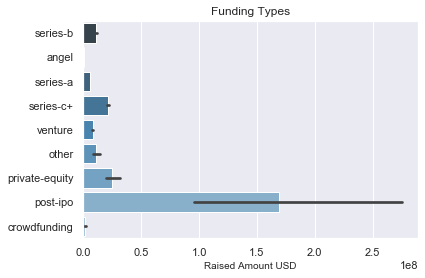

In [71]:
# plot types of funding and raised amount
sns.set()
ax = sns.barplot(x=funding_rounds['raised_amount_usd'], y=funding_rounds['funding_round_type'], 
                 data=funding_rounds, palette="Blues_d")
plt.title("Funding Types")
plt.xlabel("Raised Amount USD", size=10)
plt.ylabel("", size=10)

In [72]:
#find what currency fueled the highest post valuation
funding_rounds.groupby(['raised_currency_code']).post_money_valuation_usd.mean().reset_index().sort_values('post_money_valuation_usd',ascending=False) 

,raised_currency_code,post_money_valuation_usd
7,USD,2.099357e+06
1,CAD,8.342143e+05
4,JPY,2.662343e+05
3,GBP,1.107724e+05
2,EUR,8.139364e+04
6,SEK,1.947046e+04
0,AUD,0.000000e+00
5,NIS,0.000000e+00


# Data Checks

In [73]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462649 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [74]:
acquisitions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9562 entries, 1 to 9562
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acquisition_id       9562 non-null   int64  
 1   acquiring_object_id  9562 non-null   object 
 2   acquired_object_id   9561 non-null   object 
 3   term_code            1906 non-null   object 
 4   price_amount         9562 non-null   float64
 5   price_currency_code  9558 non-null   object 
 6   acquired_at          9533 non-null   object 
 7   source_url           8566 non-null   object 
 8   source_description   8590 non-null   object 
 9   created_at           9562 non-null   object 
 10  updated_at           9562 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 896.4+ KB


In [75]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1 to 1259
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ipo_id                   1259 non-null   int64  
 1   object_id                1254 non-null   object 
 2   valuation_amount         1259 non-null   float64
 3   valuation_currency_code  1257 non-null   object 
 4   raised_amount            1259 non-null   float64
 5   raised_currency_code     699 non-null    object 
 6   public_at                659 non-null    object 
 7   stock_symbol             1259 non-null   object 
 8   source_url               191 non-null    object 
 9   source_description       180 non-null    object 
 10  created_at               1259 non-null   object 
 11  updated_at               1259 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 127.9+ KB


# Data Analysis

#### Data analysis for people, degree and objects table


In [76]:
#merging people and degree tables
people_degree=people.merge(degrees,on='object_id')
people_degree.head()

,id,object_id,first_name,last_name,birthplace,affiliation_name,degree_type,institution
0,10,p:11,Dustin,Moskovitz,"Gainesville, FL",Facebook,No degree,Harvard University
1,22,p:24,Alice,Lankester,"Surrey, England",Apple,BA,University of Leeds
2,33,p:39,Jason,Rubin,USA,Monkey Gods,BA,University of Michigan
3,74,p:84,Andrew,Weinreich,"New York, New York",drop.io,JD,Fordham University School of Law
4,115,p:135,Josh,Kopelman,"Great Neck, New York",First Round Capital,BS,University of Pennsylvania


In [77]:
people_degree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17223 entries, 0 to 17222
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17223 non-null  int64 
 1   object_id         17223 non-null  object
 2   first_name        17223 non-null  object
 3   last_name         17223 non-null  object
 4   birthplace        17223 non-null  object
 5   affiliation_name  17223 non-null  object
 6   degree_type       17223 non-null  object
 7   institution       17223 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.2+ MB


In [78]:
#counting the number of people per school
inst_count=people_degree.groupby(by="institution").count()['object_id']
inst_count

institution
"Alexandru Ioan Cuza" University of Iasi         2
"Babes Bolyai" University of Cluj-Napoca         1
"Babes-Bolyai" University of Cluj-Napoca         4
"La Sapienza" University, Rome                   1
"Leonardo" institute, Giarre (Catania, Italy)    1
                                                ..
Århus Universitet                                1
Çukurova Üniversitesi                            2
École Centrale de Lille                          1
École Polytechnique de Montréal                  1
École Supérieure dElectricité                   1
Name: object_id, Length: 6668, dtype: int64

In [79]:
#counting the number of people by degree type
degree_count=people_degree['degree_type'].value_counts()
degree_count.head(10)

BS       4239
BA       2629
MS       2166
MBA      1837
PhD       406
MA        339
BBA       268
JD        242
BE        184
BTECH     183
Name: degree_type, dtype: int64

In [89]:
people_degree=people_degree.loc[people_degree['degree_type'].isin(['BS','MBA','BA','MS','PhD'])]
people_degree= people_degree[['object_id', 'institution', 'degree_type','affiliation_name']]
people_degree

,object_id,institution,degree_type,affiliation_name
1,p:24,University of Leeds,BA,Apple
2,p:39,University of Michigan,BA,Monkey Gods
4,p:135,University of Pennsylvania,BS,First Round Capital
5,p:142,St. Norbert College,BS,Strands
6,p:142,Oregon State University,MBA,Strands
...,...,...,...,...
17190,p:266150,UCLA,PhD,Smart Media Corporation
17194,p:266532,Stanford,BS,Unaffiliated
17196,p:266574,"Cal Poly, San Luis Obispo",MS,Unaffiliated
17197,p:266605,MET Institute of Management,MBA,Unaffiliated


In [81]:
#testing the degree count after limiting the dataframe to list of degree types
degree_count=people_degree['degree_type'].value_counts()
degree_count

BS     4239
BA     2629
MS     2166
MBA    1837
PhD     406
Name: degree_type, dtype: int64

In [82]:
#checking the top 20 most affiliated firms
aff_count=people_degree['affiliation_name'].value_counts()
aff_count

Unaffiliated                    2661
Google                            85
Microsoft                         38
Yahoo!                            32
TechCrunch                        25
                                ... 
WorkTouch                          1
BLACK Design Associates, LLC       1
Venice Consulting Group            1
Avaya                              1
Airport Chatter                    1
Name: affiliation_name, Length: 5875, dtype: int64

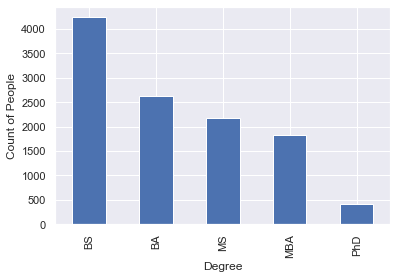

In [83]:
# degree type graph by the count of people
degree_count.plot(kind='bar')
plt.xlabel("Degree")
plt.ylabel("Count of People");

In [84]:
# limiting objects table to only show ipos
objects_ipo=objects[objects["status"] == "ipo"]
objects_ipo.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
110,c:100844,Company,100844,NaN,Attunity,attunity,/company/attunity,software,ipo,NaN,...,2011-09-21,4,10500000.0,2012-02-14,2012-02-14,1,1,timircha,2011-09-07 13:47:49,2013-07-16 15:49:48
139,c:10106,Company,10106,NaN,Thomson Reuters,thomson reuters,/company/thomson-reuters,public_relations,ipo,2008-04-17,...,NaN,0,0.0,2010-06-08,2013-04-29,4,100,NaN,2008-08-26 07:43:06,2012-08-09 13:33:58
231,c:10166,Company,10166,NaN,Acxiom,acxiom,/company/acxiom,software,ipo,1969-01-01,...,NaN,0,0.0,2012-05-01,2013-02-27,2,27,NaN,2008-08-27 01:09:42,2013-03-18 21:27:51
337,c:10222,Company,10222,NaN,Hitachi,hitachi,/company/hitachi,public_relations,ipo,NaN,...,NaN,0,0.0,2009-12-09,2013-08-23,3,44,NaN,2008-08-27 21:43:47,2013-11-25 08:36:12
738,c:104198,Company,104198,NaN,Integra LifeSciences Holdings,integra lifesciences holdings,/company/integra-lifesciences-holdings,biotech,ipo,NaN,...,NaN,0,0.0,2010-01-01,2010-01-01,1,5,arun,2011-09-13 03:30:23,2011-09-13 03:30:23


In [85]:
status_count=objects_ipo['status'].value_counts()
status_count

ipo    1134
Name: status, dtype: int64

In [91]:
#merging people_degree dataframe with objects table
ppd_obj=people_degree.merge(objects_ipo,left_on='affiliation_name', right_on='name')
ppd_obj.head()

,object_id,institution,degree_type,affiliation_name,id,entity_type,entity_id,parent_id,name,normalized_name,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,p:24,University of Leeds,BA,Apple,c:1654,Company,1654,NaN,Apple,apple,...,NaN,0,0.0,2013-03-05,2013-12-11,4,469,initial-importer,2007-12-22 04:28:53,2013-12-04 06:16:19
1,p:9778,Utica College,BS,Apple,c:1654,Company,1654,NaN,Apple,apple,...,NaN,0,0.0,2013-03-05,2013-12-11,4,469,initial-importer,2007-12-22 04:28:53,2013-12-04 06:16:19
2,p:13888,University of Colorado,BS,Apple,c:1654,Company,1654,NaN,Apple,apple,...,NaN,0,0.0,2013-03-05,2013-12-11,4,469,initial-importer,2007-12-22 04:28:53,2013-12-04 06:16:19
3,p:13888,Manhattanville College,MS,Apple,c:1654,Company,1654,NaN,Apple,apple,...,NaN,0,0.0,2013-03-05,2013-12-11,4,469,initial-importer,2007-12-22 04:28:53,2013-12-04 06:16:19
4,p:13979,Stanford University,BS,Apple,c:1654,Company,1654,NaN,Apple,apple,...,NaN,0,0.0,2013-03-05,2013-12-11,4,469,initial-importer,2007-12-22 04:28:53,2013-12-04 06:16:19


In [92]:
degree_count=ppd_obj['degree_type'].value_counts()
degree_count.head(20)

BS     207
MBA    102
MS      95
BA      87
PhD     21
Name: degree_type, dtype: int64

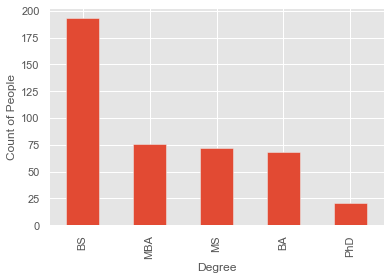

In [208]:
#ipo degree type
degree_count.plot(kind='bar')
plt.xlabel("Degree")
plt.ylabel("Count of People");

In [93]:
name_count=ppd_obj['name'].value_counts()
name_count.head(20)

Google                85
Microsoft             38
Yahoo!                32
Apple                 15
LinkedIn              14
Facebook              14
Twitter               14
Oracle Corporation    12
Accenture             12
IBM                   12
eBay                  11
AOL                   10
Hewlett-Packard       10
Cisco                  9
SAP                    8
Intel                  8
AT&T                   7
Amazon                 7
Nokia                  6
Intuit                 6
Name: name, dtype: int64

In [94]:
#limiting DataFrame to top 20 most affliated
ppd_obj=ppd_obj.loc[ppd_obj['name'].isin(['Google','Yahoo!','Microsoft','Facebook','Comcast', 'Amazon',
                                          'Motorola Solutions','eBay','Apple', 'AOL','IBM','Twitter','Cisco',
                                          'Accenture','LinkedIn','Oracle Corporation','Hewlett-Packard','Intel',
                                          'New York Times','Juniper Networks'])]
ppd_obj= ppd_obj[['object_id','name', 'institution', 'degree_type','affiliation_name']]

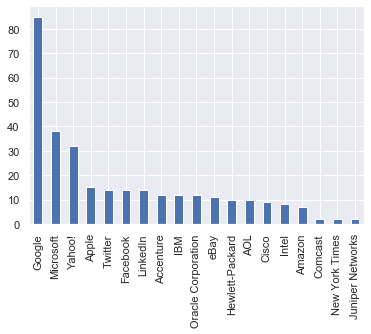

In [95]:
#most affliated companies in ipo
name_count=ppd_obj['name'].value_counts()
name_count.plot(kind='bar');

In [96]:
pd.crosstab(ppd_obj['name'], ppd_obj['degree_type'])

degree_type,BA,BS,MBA,MS,PhD
name,,,,,
AOL,3,5,0,2,0
Accenture,2,6,2,2,0
Amazon,0,4,0,2,1
Apple,4,6,1,4,0
Cisco,3,3,1,1,1
Comcast,0,1,1,0,0
Facebook,3,7,2,2,0
Google,9,39,22,15,0
Hewlett-Packard,1,4,2,3,0


#### Data analysis for the joined table 'df2'

In [217]:
#df_people_objects=people.merge(degrees,on='object_id')
#people_affilitions=df_people_objects.merge(objects,left_on='affiliation_name', right_on='name')

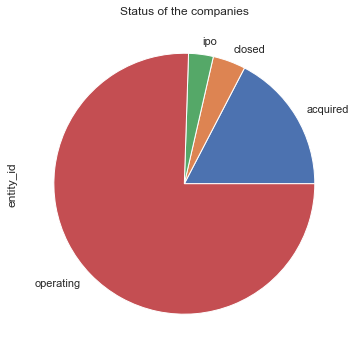

In [97]:
entity_status = df2.groupby('status')['entity_id'].count()
entity_status[["acquired","closed","ipo","operating"]].plot(kind='pie', figsize=(10,6), title='Status of the companies');

It shows that most of the companies are at the operating stage.

Let's see some top results

In [98]:
top_ten_category= df2.groupby('category_code').sum().sort_values("funding_total_usd", ascending=False)['funding_total_usd'].head(10)
top_ten_category   # showing the top ten categories based on the funding amount

category_code
biotech        3.501211e+11
software       3.314601e+11
cleantech      3.066128e+11
enterprise     2.356181e+11
mobile         2.159844e+11
web            2.068630e+11
ecommerce      1.576020e+11
social         1.570006e+11
advertising    1.411892e+11
games_video    1.381159e+11
Name: funding_total_usd, dtype: float64

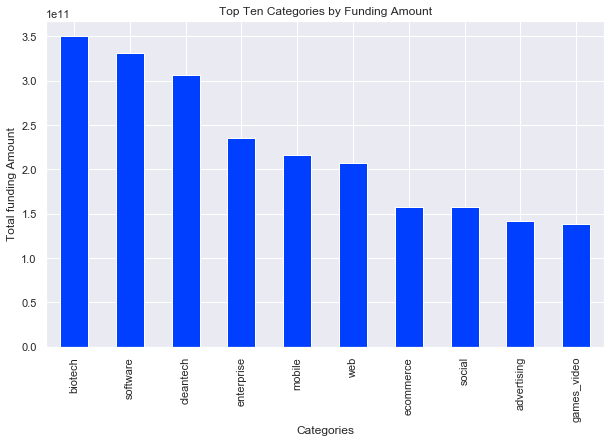

In [99]:
# Plotting the above result
plt.style.use('seaborn-bright')
plt.figure(figsize=(10,6))
top_ten_category.plot(kind='bar');
plt.ylabel('Total funding Amount');
plt.xlabel('Categories');
plt.title('Top Ten Categories by Funding Amount');

In [100]:
#Top regions based on the number of invested companies
top_regions= df2.groupby('region').count().sort_values(by='invested_companies', ascending=False)['invested_companies'].head(10)
top_regions

region
SF Bay           27717
New York          5977
Boston            4399
London            3000
Los Angeles       2446
Seattle           1980
unknown           1964
Austin            1648
San Diego         1111
Washington DC     1002
Name: invested_companies, dtype: int64

In [101]:
#people_affilitions

In [103]:
# top companies by funding amount
#top_companies=people_affilitions.groupby('affiliation_name').sum().sort_values("funding_total_usd", ascending=False)['funding_total_usd'].head(15) 
#top_companies

In [104]:
# top companies by funding amount
top_companies=df2.groupby('entity_name').sum().sort_values("funding_total_usd", ascending=False)['funding_total_usd'].head(15) 
top_companies

entity_name
Groupon                5.965900e+10
Facebook               5.579110e+10
Twitter                5.336766e+10
Zynga                  4.731172e+10
Box                    3.963420e+10
BrightSource Energy    3.211000e+10
Fisker Automotive      3.192200e+10
SolarCity              2.840544e+10
Nanosolar              2.444000e+10
CardioDx               2.246476e+10
Fab.com                2.152480e+10
Bloom Energy           2.058000e+10
Tesla Motors           1.975200e+10
Jawbone                1.934146e+10
Pinterest              1.856250e+10
Name: funding_total_usd, dtype: float64

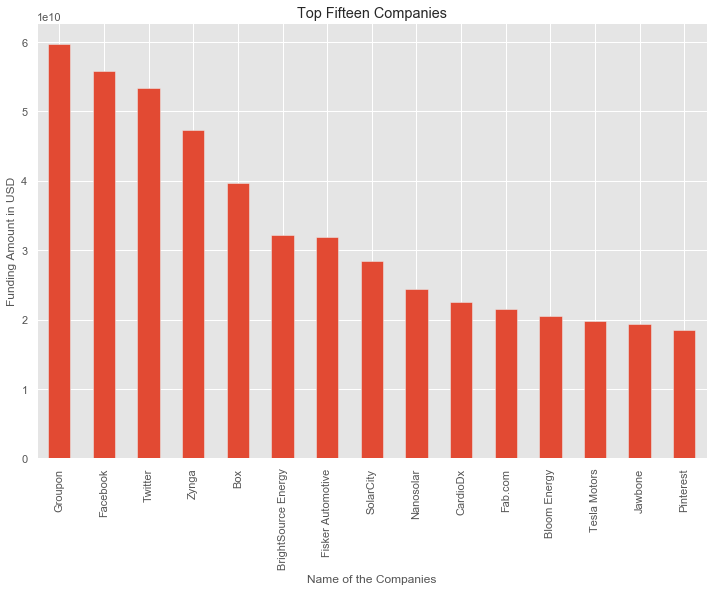

In [105]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
top_companies.plot(kind='bar');
plt.ylabel('Funding Amount in USD');
plt.xlabel('Name of the Companies');
plt.title('Top Fifteen Companies');

In [109]:
# top funding sources
#fund_name_raised = funds.groupby('name').sum().sort_values("raised_amount", ascending=False)['raised_amount'].head(15)
#fund_name_raised

In [110]:
# top funding sources
fund_name_raised = df2.groupby('fund_name').sum().sort_values("raised_amount", ascending=False)['raised_amount'].head(15)
fund_name_raised

fund_name
Accel Fund                          4770000000000
NEA 14                              1328600000000
Thirteenth Fund                     1277500000000
Fund III                             629980900000
Warburg Pincus Private Equity XI     548800000000
Fund VII                             544924000000
Carlyle Partners VI                  520000000000
China Fund                           506000000000
Fund VI                              482262000000
Venture Fund 2012                    480000000000
Bessemer Venture Partners VIII       448000000000
Accel Growth Fund II                 417375000000
Fund XIV                             380735000000
Global Growth Fund                   354200000000
Fund II                              343565700000
Name: raised_amount, dtype: int64

In [111]:
# Top categories by the number of invested companies
#category_company_invested = people_affilitions.groupby('category_code').count().sort_values('invested_companies', ascending = False )['invested_companies'].head(15)
#category_company_invested

In [112]:
# Top categories by the number of invested companies
category_company_invested = df2.groupby('category_code').count().sort_values('invested_companies', ascending = False )['invested_companies'].head(15)
category_company_invested

category_code
software           9619
enterprise         6107
web                5652
biotech            5462
mobile             5254
advertising        4355
ecommerce          3386
games_video        3086
cleantech          2726
analytics          2271
hardware           2206
semiconductor      1942
security           1471
network_hosting    1389
finance            1316
Name: invested_companies, dtype: int64

Exploring the funding trend over the years

In [115]:
#funds['funded_at'] = pd.to_datetime(funds['funded_at'])
#funds['funded_year'] = [x.year for x in funds['funded_at']]
#funded_year_grouped = funds.groupby('funded_year')
#funded_year_company=funded_year_grouped['name'].count().reset_index()
#plt.figure(figsize=(18,6))
#sns.barplot(x= 'funded_year', y= 'name', data= funded_year_company)

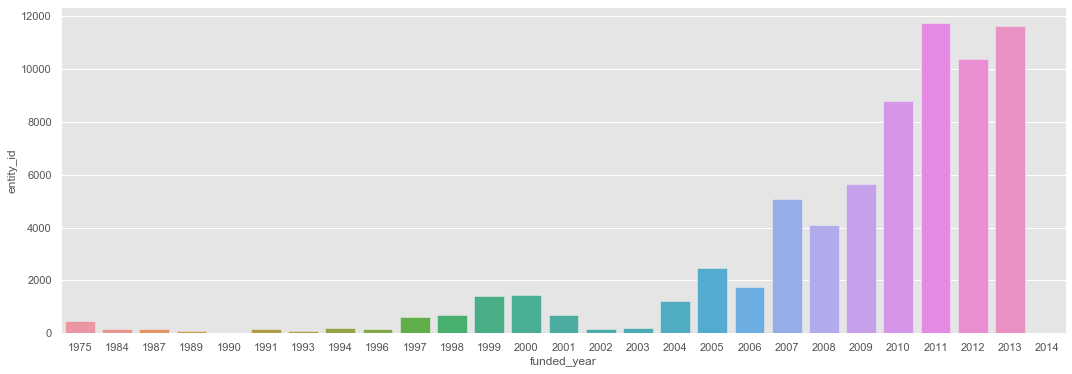

In [116]:
df2['funded_at'] = pd.to_datetime(df2['funded_at'])
df2['funded_year'] = [x.year for x in df2['funded_at']]
funded_year_grouped = df2.groupby('funded_year')
funded_year_company=funded_year_grouped['entity_id'].count().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(x= 'funded_year', y= 'entity_id', data= funded_year_company)

In [117]:
# Acquisitions: drop missing acquisition dates
acquisitions_clean = acquisitions.copy()
acquisitions_clean.dropna(subset=['acquired_at'],inplace=True)
acquisitions_clean['acquired_at'] = pd.to_datetime(acquisitions_clean['acquired_at'])
acquisitions_clean['acquired_year'] = [x.year for x in acquisitions_clean['acquired_at']]
display(acquisitions_clean.head())

,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at,acquired_year
id,,,,,,,,,,,,
1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44,2007
2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05,2007
3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50,2007
4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17,2007
5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47,2007


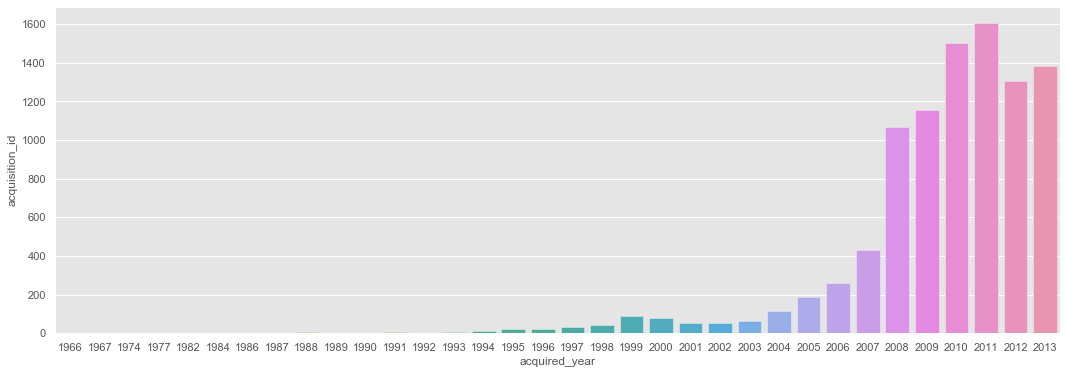

In [128]:
# plot # of acquisitions in each year
acquisitions_grouped = acquisitions_clean.groupby('acquired_year')
acq_year=acquisitions_grouped['acquisition_id'].count().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(x= 'acquired_year', y= 'acquisition_id', data= acq_year)

In [118]:
# ipos: drop missing public dates
ipos_clean = ipos.copy()
ipos_clean.dropna(subset=['public_at'],inplace=True)
ipos_clean['public_at'] = pd.to_datetime(ipos_clean['public_at'])
ipos_clean['public_year'] = [x.year for x in ipos_clean['public_at']]
display(ipos_clean.head())

,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at,public_year
id,,,,,,,,,,,,,
1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59,1980
2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46,1986
3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16,1969
4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08,2004
5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22,1997


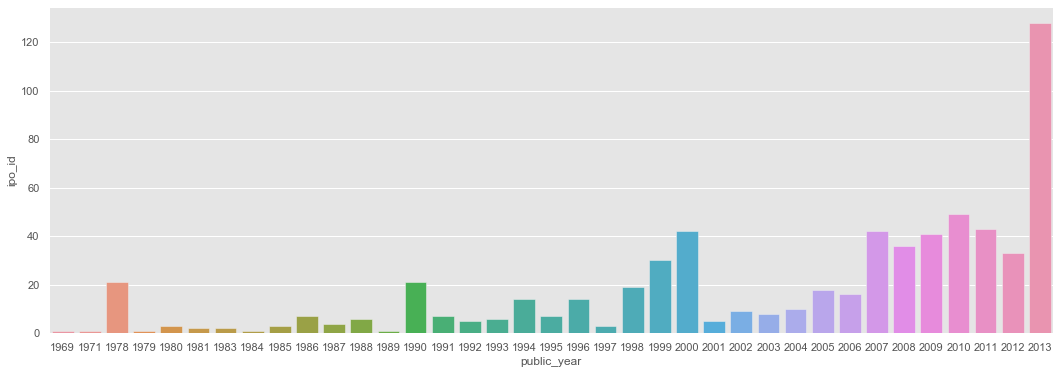

In [129]:
# plot # of ipos in each year
ipos_grouped = ipos_clean.groupby('public_year')
ipos_year=ipos_grouped['ipo_id'].count().reset_index()
plt.figure(figsize=(18,6))
sns.barplot(x= 'public_year', y= 'ipo_id', data= ipos_year)

## Analyzing impact of office location


Text(0.5, 0, 'No. of startups')

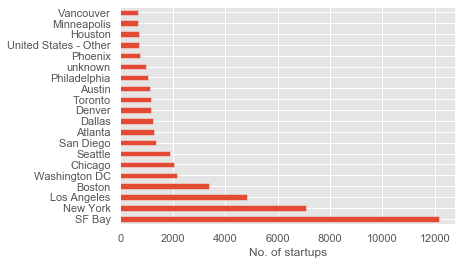

In [119]:
# Analyze most popular regions
offices_plot = offices_list['region'].value_counts()[:20].plot(kind='barh')
offices_plot.set_xlabel("No. of startups")

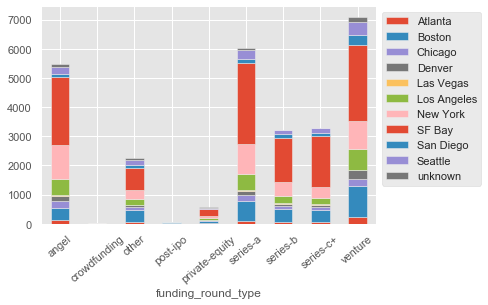

In [120]:
# Plot funding vs region
df = funding_rounds_list.groupby(['funding_round_type','region'])['funding_round_type'].count().unstack('region').fillna('')
#df = funding_rounds_list.groupby(['funding_round_type','region'])['funding_round_type'].count().unstack('region').dropna()
df.plot(kind='bar',stacked=True,rot=40)
plt.legend(bbox_to_anchor=(1.0,1.0))

Text(0, 0.5, 'No. of Acquisitions')

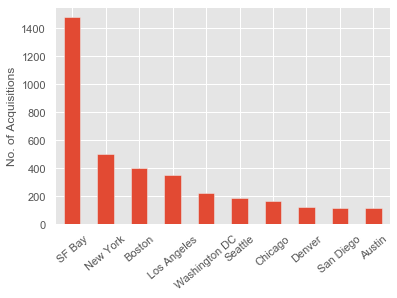

In [121]:
# Plot acquisitions vs region
acq_plot = acquisitions_list['region'].value_counts()[:10].plot(kind='bar',rot=40)
acq_plot.set_ylabel("No. of Acquisitions")

## Understanding and Predicting Start-Up Success

In this section, we're going to attempt to answer the question "What contributes to start-up success." In particular, we'll look into the start-up status available and determine which characteristics occur together with particular statuses, as well as have predictive qualities of certain statuses. 
In particular, we'll consider the event of a start-up going to IPO as a measure of success, since it represents a moment of maturity for companies in their capacity to bring value to their investors and employees. As such, let's take a look at what we know based on our dataset about start-ups that reach the IPO status.

In [122]:
companies = objects_cleaned[objects_cleaned["entity_type"]=="Company"]
companies.columns

Index(['funded_object_id', 'entity_type', 'entity_id', 'name', 'status',
       'region', 'investment_rounds', 'invested_companies', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'created_at',
       'updated_at', 'category_code'],
      dtype='object')

In [123]:
# first let's take a look at an overall summary by status  
status_summary = companies.groupby('status').agg(
    totalCount = pd.NamedAgg(column='entity_type', aggfunc='count'),
    avgInvestRounds = pd.NamedAgg(column='investment_rounds', aggfunc='mean'),
    avgInvestCompanies = pd.NamedAgg(column='invested_companies', aggfunc='mean'),
    avgFundingRounds = pd.NamedAgg(column='funding_rounds', aggfunc='mean'),
    avgFundingTotal = pd.NamedAgg(column='funding_total_usd', aggfunc='mean'),
    avgMilestones = pd.NamedAgg(column='milestones', aggfunc='mean'),
    avgRelationships = pd.NamedAgg(column='relationships', aggfunc='mean'))
status_summary = status_summary.reset_index()
status_summary

,status,totalCount,avgInvestRounds,avgInvestCompanies,avgFundingRounds,avgFundingTotal,avgMilestones,avgRelationships
0,acquired,9394,0.020545,0.017990,0.523526,5.475722e+06,0.757931,3.421759
1,closed,2584,0.005418,0.005418,1.118421,5.624867e+06,0.782121,2.310759
2,ipo,1134,0.828924,0.708113,1.091711,4.217205e+07,1.578483,23.253968
3,operating,183441,0.027251,0.025769,0.237570,1.631037e+06,0.539972,1.664481


Text(0.5, 1.0, 'Average Startup Funding Total by Status')

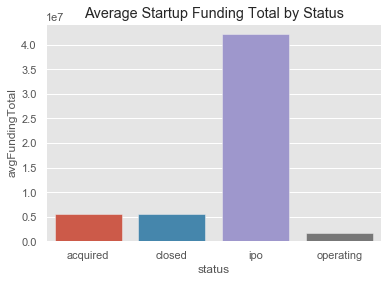

In [124]:
# there seem to be some variables that differ highly for companies that go to IPO vs those that do not
sns.barplot(x="status", y="avgFundingTotal", data=status_summary).set_title('Average Startup Funding Total by Status')

Text(0.5, 1.0, 'Average Number of Startup Relationships by Status')

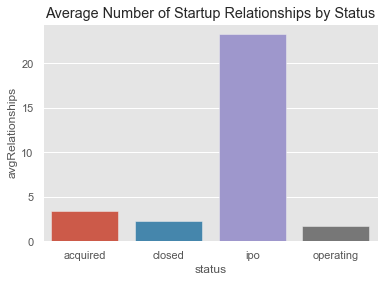

In [125]:
sns.barplot(x="status", y="avgRelationships", data=status_summary).set_title('Average Number of Startup Relationships by Status')

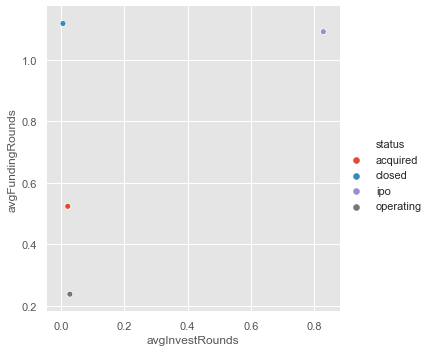

In [126]:
sns.relplot(x="avgInvestRounds", y="avgFundingRounds", hue="status", data=status_summary)

The data visualization above suggest that going to IPO is likely for  companies with more investors, more investment and funding rounds, more total dollars invested, and more relationships. Next, let's see if a more robust logistical regression will have the same findings.

In [127]:
companies['is_ipo'] = np.where(companies['status']=='ipo', 1, 0)
companies.head(5)

,funded_object_id,entity_type,entity_id,name,status,region,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,category_code,is_ipo
0,c:1,Company,1,Wetpaint,operating,Seattle,0,0,3,39750000.0,5,17,2007-05-25 06:51:27,2013-04-13 03:29:00,web,0
1,c:10,Company,10,Flektor,acquired,Los Angeles,0,0,0,0.0,0,6,2007-05-31 21:11:51,2008-05-23 23:23:14,games_video,0
2,c:100,Company,100,There,acquired,SF Bay,0,0,0,0.0,4,12,2007-08-06 23:52:45,2013-11-04 02:09:48,games_video,0
3,c:10000,Company,10000,MYWEBBO,operating,unknown,0,0,0,0.0,0,0,2008-08-24 16:51:57,2008-09-06 14:19:18,network_hosting,0
4,c:10001,Company,10001,THE Movie Streamer,operating,unknown,0,0,0,0.0,0,0,2008-08-24 17:10:34,2008-09-06 14:19:18,games_video,0


In [240]:
# consider converting Region into a dataset usable for prediction
pd.get_dummies(companies["region"])
# that does not seem useful, almost 6,000 different options across regions (and one of them is babylon?)

,?stanbul / Ata?ehir,A CoruÃ±a,A Coruña,AC Joure,ACT,AE,AGios Stefanos,AIX EN PROVENCE Cedex,AL Leiden,ALMADA,...,virudhunagar,visakhapatnam,w. babylon,weston-super-mare,wickford,wilkes barre,xiamen,yahud,yaounde,zhengzhou
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
predict_dataset = companies.drop(['entity_type','entity_id', 'name', 'region', 
                                  'status', 'created_at', 'updated_at', 'funded_object_id', 'category_code'], axis=1)
# re-shape and split into test and train sets
x = predict_dataset.iloc[:,0:6].to_numpy()
y = predict_dataset.iloc[:, -1].to_numpy()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

# run simple logitic regression and predict values for the test set
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predict = clf.predict(x_test)

# let's see the model accuracy
clf.score(x_test, y_test)
# over 99% is looking good

0.9943018783451026

In [249]:
# interpret the outcomes
odds = np.exp(clf.coef_[0])
pd.DataFrame(odds, 
             predict_dataset.columns[0:6], 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
invested_companies,1.0
investment_rounds,1.0
funding_rounds,1.0
milestones,1.0
relationships,1.0
funding_total_usd,1.0


In conclusion, the logistic regression generates a very strong accuracy, and an interpretation of the odds for each variable suggests a strong predictive quality (all in the same direction) for all the variables included. 

As such, as can conclude that the more investment (rounds, companies, dollars), the more milestones and the more relationships, then the likely the company is to go to IPO.

As a high-level summary, we can say that the more support a company has, the more likely it is to succeed.

# Supplemental Data Acquisition Effort

One of our ideas was - since this dataset is from 2013 - can we use this data  to predict where companies ended up eight years later in 2021. In order to do so, we need to use the permalink provided to scape some current information about the companies. 

In [250]:
companies = objects[objects["entity_type"]=="Company"]
links = companies[["entity_id", "name", "permalink"]]
links.loc[:, 'permalink'] =  'http://www.crunchbase.com' + links.loc[:, 'permalink']
links.head()

,entity_id,name,permalink
0,1,Wetpaint,http://www.crunchbase.com/company/wetpaint
1,10,Flektor,http://www.crunchbase.com/company/flektor
2,100,There,http://www.crunchbase.com/company/there
3,10000,MYWEBBO,http://www.crunchbase.com/company/mywebbo
4,10001,THE Movie Streamer,http://www.crunchbase.com/company/the-movie-st...


Now that we've determined the URLs to check, we can use the python BeautifulSoup package to take a look at the information available within the URLs and find a way to store this recent information in a useful basis.

In [251]:
import requests
import bs4
from bs4 import BeautifulSoup
url = links["permalink"][1]
print(url)
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "Accept-Language": "en-US,en;q=0.5", "Accept-Encoding": "gzip, deflate", "DNT": "1", "Connection": "close", "Upgrade-Insecure-Requests": "1"}
#headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36", "Accept":"text/html,application/xhtml+xml,application/xml; q=0.9,image/webp,image/apng,*/*;q=0.8"}
page = requests.get(url, headers=headers)
soup = bs4.BeautifulSoup(page.text)
soup

http://www.crunchbase.com/company/flektor


<!DOCTYPE html>
<html lang="en"><head heap-env="973801186" perimeterx-id="rw7M6iAV" sentry-dsn="https://ad6d278f98e347409c82d6e3899597a4@sentry.io/190044" supported-browser="false">
<title>Flektor - Crunchbase Company Profile &amp; Funding</title>
<meta content="width=device-width, minimum-scale=1.0, initial-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="D0Crp7AShYxB6XBQLfVq4hOgCHyZ_qQiMOTpUioaeQU" name="google-site-verification"/>
<base href="/"/>
<link href="/favicon.ico?v=1.0" rel="icon"/>
<style type="text/css">@font-face{font-family:'Roboto';font-style:normal;font-weight:300;font-display:swap;src:url(https://fonts.gstatic.com/s/roboto/v27/KFOlCnqEu92Fr1MmSU5fBBc-.woff) format('woff');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;font-display:swap;src:url(https://fonts.gstatic.com/s/roboto/v27/KFOmCnqEu92Fr1Mu4mxM.woff) format('woff');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;font-display:swap;src:url(https://fonts.gstati

Looking through the html extract, we've found that there is a number of elements within the "field-formatter" tags, with labels for the fields within the "label-with-info" tags. 
After a whole lot of troubleshooting - which we will spare you in this report - the following code effectively parses the code to determine the set of elements available on the crunchbase website. Consider the following code for the url & html that was obtained above:  

In [252]:
test = soup.find_all('fields-card')
output_data = []
for each in test: 
   # fields = each.find_all('field-formatter') 
    labels = each.find_all('label-with-info')
    for subeach in labels: 
        labeltext = subeach.get_text()
        # print(labeltext)
        # once we've found a data label, looks for the next available field and that will be the data field
        field = subeach.nextSibling
        while field is None: 
            field = field.nextSibling
        fieldtext = field.get_text()
        #print(fieldtext)
        output_data.append([labeltext, fieldtext])

output_data = pd.DataFrame(output_data, columns=["label", "field"])
output_data

,label,field
0,Acquired by,Fox Interactive Media
1,Industries,MobileNewsPhotographySoftwareVideo
2,Headquarters Regions,"Greater Los Angeles Area, West Coast, Western US"
3,Founded Date,2006
4,Founders,"Andy Gavin, Jason Kay, Jason Rubin"
5,Operating Status,Active
6,Company Type,For Profit
7,Transaction Name,Flektor acquired by Fox Interactive Media
8,Acquired by,Fox Interactive Media
9,Announced Date,"May 30, 2007"


This is super neat! This mean we totally can use recent data from crunchbase to suplement our dataset! It would allow us to explore questions such as "which 2013 attributes of start-ups effective their outcomes in 2021" - for example, what leads to eventual failure, acquisition, or IPO? Can we use information about start-ups' situation in 2003 to predict their total funding in 2021? 

To do so, we can generalize the code above and run through for all the known websites for start-ups in the dataset.

First, a couple of notes about the process. When first writing this code, I made a couple of mistakes that I think are worthy of note: 
First off, I tried storing all the data in a data frame - although feasible, not a great idea for trouble-shooting the data. Instead, I've found it's wiser to write to a file so that the data that was successfully output is stored permanently. 
Secondly, I tried to naively loop through all the crunchbase websites with no regard for "web scraping protocols" and was promptly banned from accessing crunchbase since it's detected I was using an automated tool. I mitigated this by adding a wait statement - of course the code will take a while to run, but since the output is written to a file, the data can be used in subsequent code without re-running the web scraping portion. 

In [253]:
import csv
import time
from datetime import datetime
links_subset = links[0:10]
#links_subset = links
end=str(links_subset.shape[0])
counter=1
print(datetime.now())

with open('webscrape_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['company_id', 'label', 'field']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for index, row in links_subset.iterrows(): 
        print("working on "+str(counter)+" out of "+end+" companies") # for developer sanity :)
        url = links["permalink"][index]
        page = requests.get(url, headers=headers)
        soup = bs4.BeautifulSoup(page.text)
        webdata = soup.find_all('fields-card')

        for element in webdata: 
           # fields = each.find_all('field-formatter') - an approach to get field names directly which did not work
            all_labels = element.find_all('label-with-info')
            for label in all_labels: 
                labeltext = label.get_text()
                #print(labeltext) - used for troubleshooting & writing code
                field = label.nextSibling
                while field is None: 
                    field = field.nextSibling
                fieldtext = field.get_text()
                #print(fieldtext) - used for troubleshooting & writing code
                writer.writerow({'company_id': index, 'label': labeltext, 'field': fieldtext})
        counter=counter+1
        time.sleep(3)
print("complete!")
print(datetime.now())

2021-04-10 22:23:19.201933
working on 1 out of 10 companies
working on 2 out of 10 companies
working on 3 out of 10 companies
working on 4 out of 10 companies
working on 5 out of 10 companies
working on 6 out of 10 companies
working on 7 out of 10 companies
working on 8 out of 10 companies
working on 9 out of 10 companies
working on 10 out of 10 companies
complete!
2021-04-10 22:24:07.955344


In [259]:
webscrape = pd.read_csv("webscrape_data.csv", encoding = "ISO-8859-1")
webscrape

,company_id,label,field
0,0,Acquired by,"Viggle, Inc."
1,0,Industries,PublishingSocial MediaSocial Media Management
2,0,Headquarters Regions,"Greater New York Area, East Coast, Northeaste..."
3,0,Founded Date,"Jun 1, 2005"
4,0,Founders,"Ben Elowitz, Michael Howell"
...,...,...,...
70,9,Founders,"Duncan Murtagh, Steven Thomas"
71,9,Operating Status,Active
72,9,Company Type,For Profit
73,9,Contact Email,vetter@getvetter.com


And now, for a healthy dose of reality. Attempting to run the above code at scale for the entire set of companies, eventually crunchbase detects that we're attempting to do some webscraping and - in order to protect their own business - blocks access to their website. The following error returns instead of the expected html on the website: 
```
Access to this page has been denied because we believe 
you are using automation tools to browse the website.
```
We've tried several attempts to get around this, including longer wait times or recycling the ```headers``` definition. Alas, crunchbase seems to do a really good job at detecting and preventing webscaping. After all, selling their data is a part of their business! 

Looks like our attempts to acquire new data to supplement our dataset is not something that will be possible within the scope of this assignment. While the lack of result is unfortunate, we wanted to report on our progress and showcase our code to show what may have been possible. After all, it's a phallacy that only positive results have enough merit to be reported. 